### Import requirements

In [72]:
import spotipy
import spotipy.util as util
import PIL
import requests
import io
from IPython.display import Image, display
import os

### Create spotipy instance

In [73]:
CLIENT_ID = "73be89d6834c41bca43441ce55d628c7"
CLIENT_SECRET = "c77b182888614bd6932b246aafa3d07c"

In [74]:
token = spotipy.oauth2.SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
cache_token = token.get_access_token()
sp = spotipy.Spotify(cache_token)

<ipython-input-74-a3b452d1525e>:2: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  cache_token = token.get_access_token()


### List of accessible genres (total of 126)

In [82]:
print(len(sp.recommendation_genre_seeds()['genres']))
sp.recommendation_genre_seeds()['genres'][:7]

126


['acoustic',
 'afrobeat',
 'alt-rock',
 'alternative',
 'ambient',
 'anime',
 'black-metal']

### Get track data for genre = metal

In [76]:
tracks = sp.recommendations(seed_artists=None, seed_genres=['metal'], seed_tracks=None, limit=20, country=None)
tracks = tracks['tracks']

### Extract album covers

In [77]:
image_urls = []

for track in tracks:
    url = track['album']['images'][0]['url']
    image_urls.append(url)

    
for i in range(len(image_urls)):
    image_url = image_urls[i]
    response = requests.get(image_url)
    filename = './image/image{}.jpg'.format(i)
    with open(filename, 'wb+') as f:
        f.write(response.content)
    

### Check downloaded images

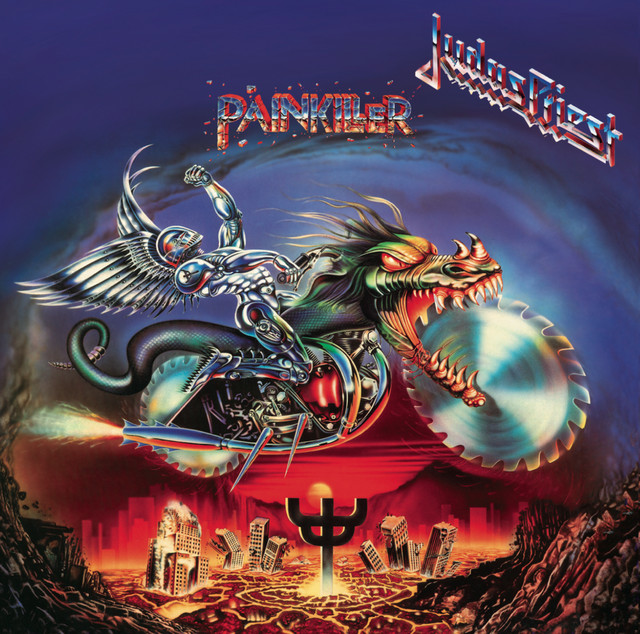

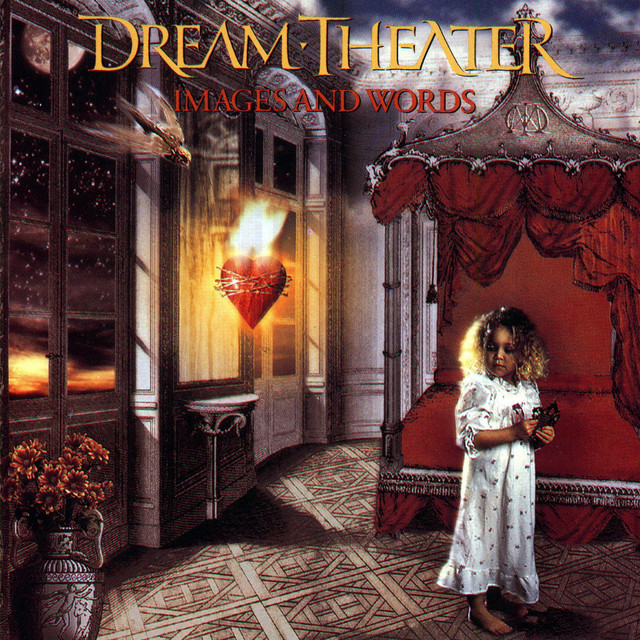

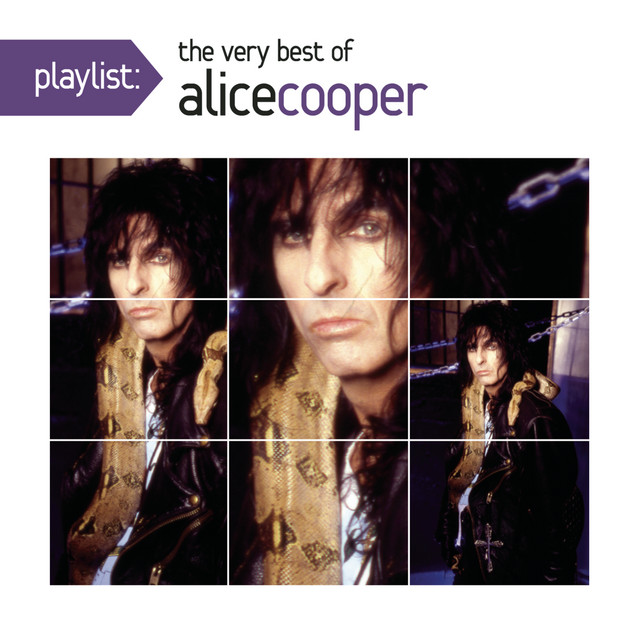

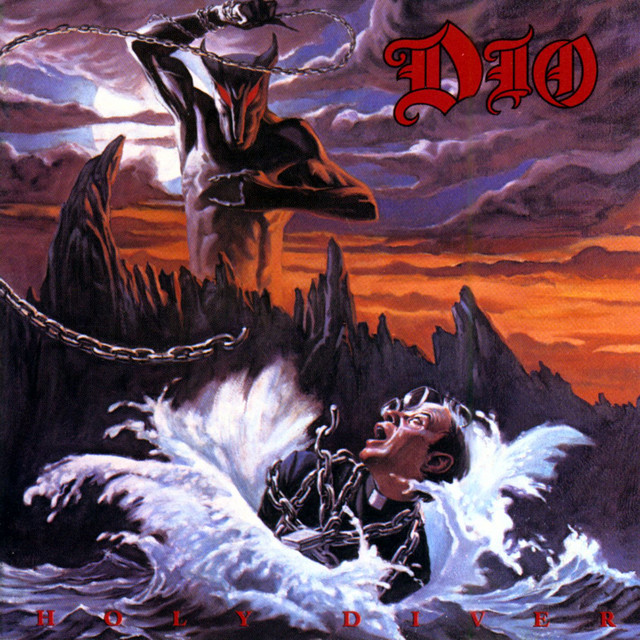

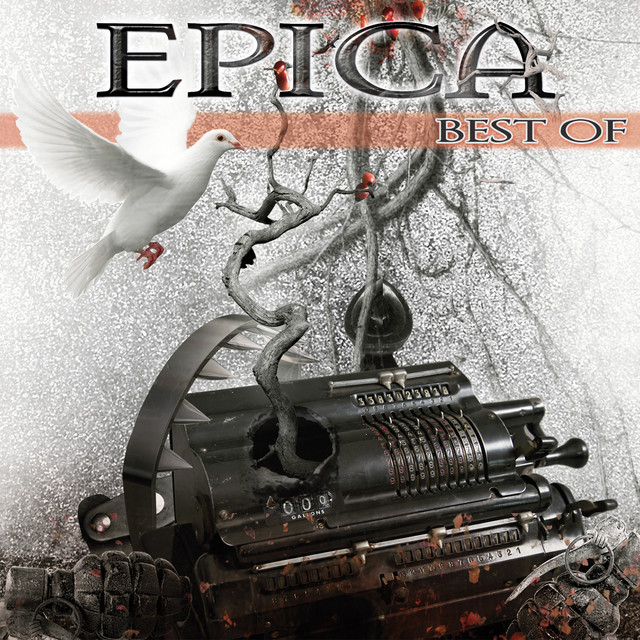

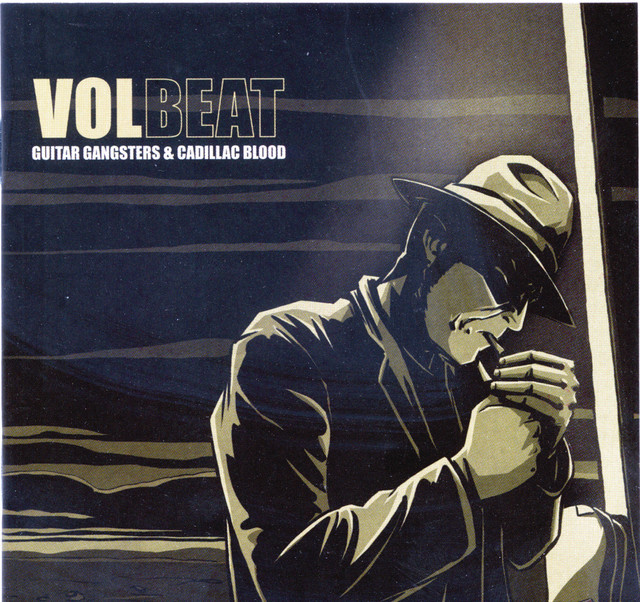

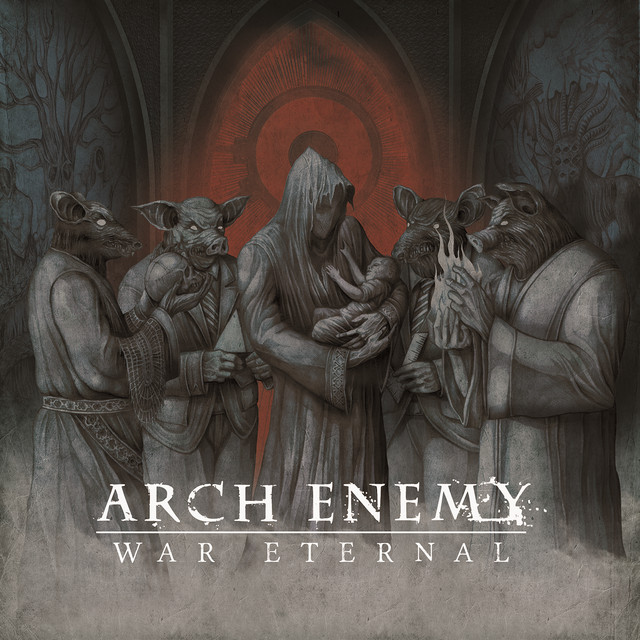

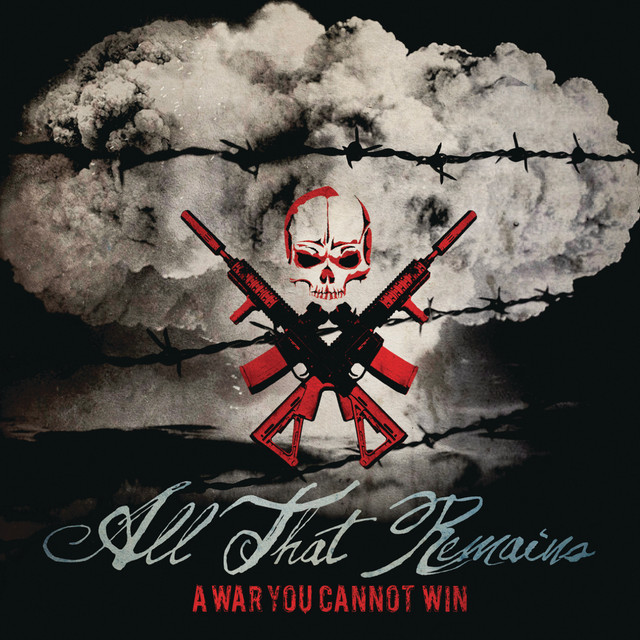

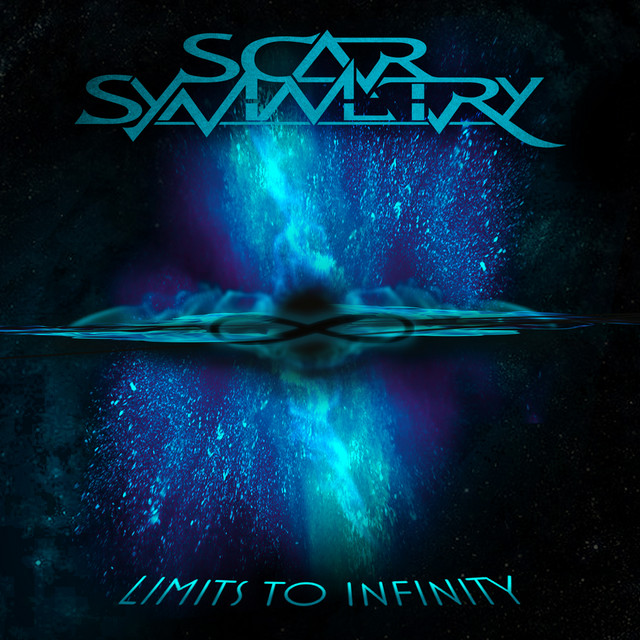

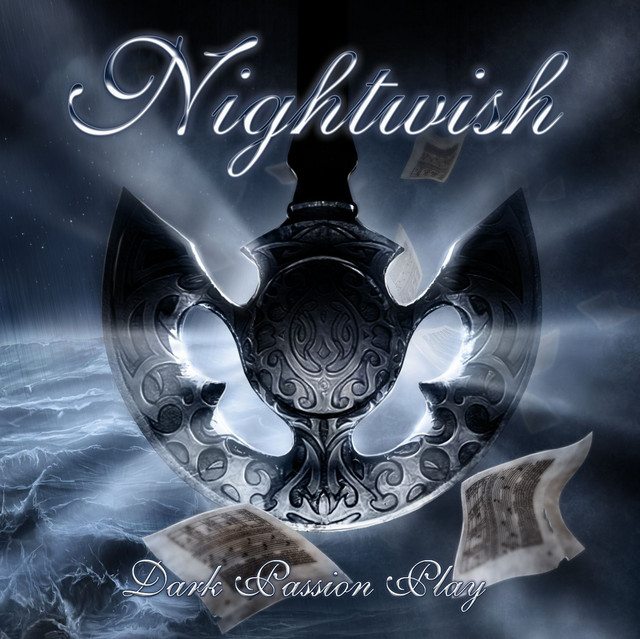

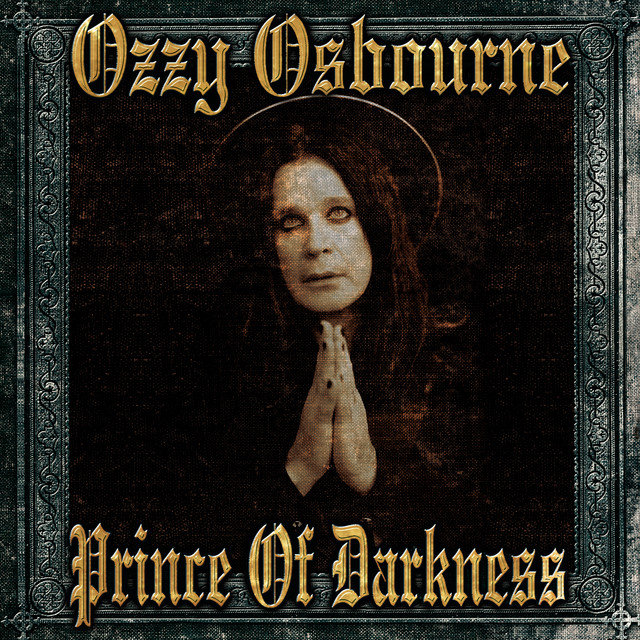

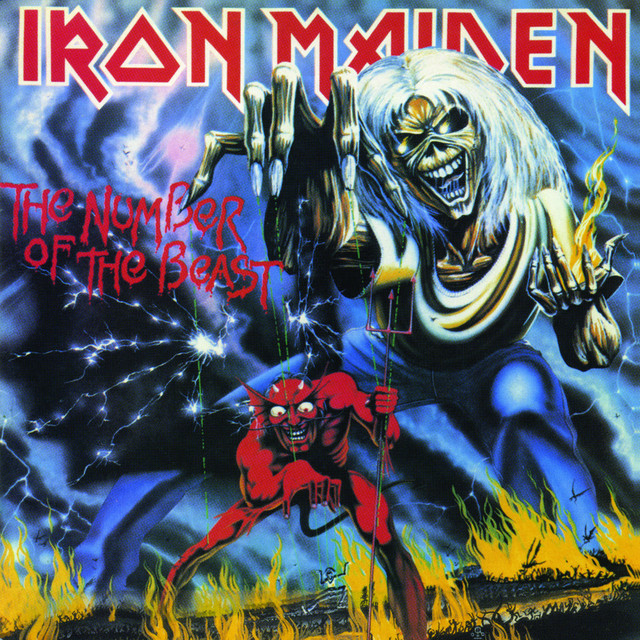

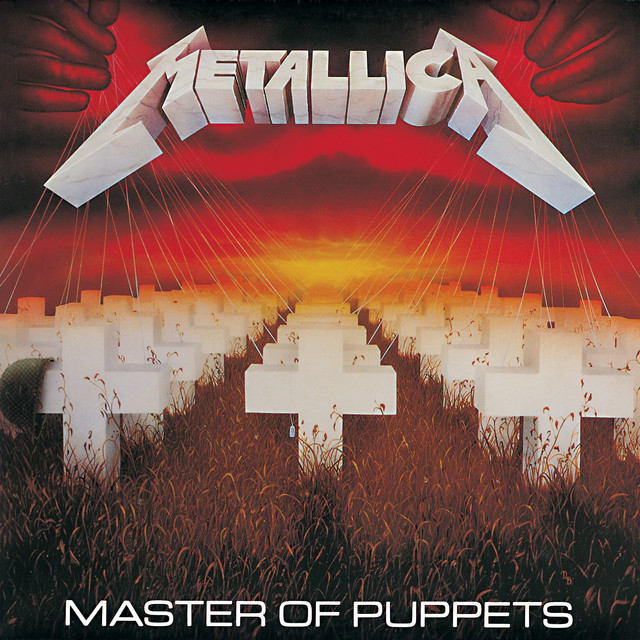

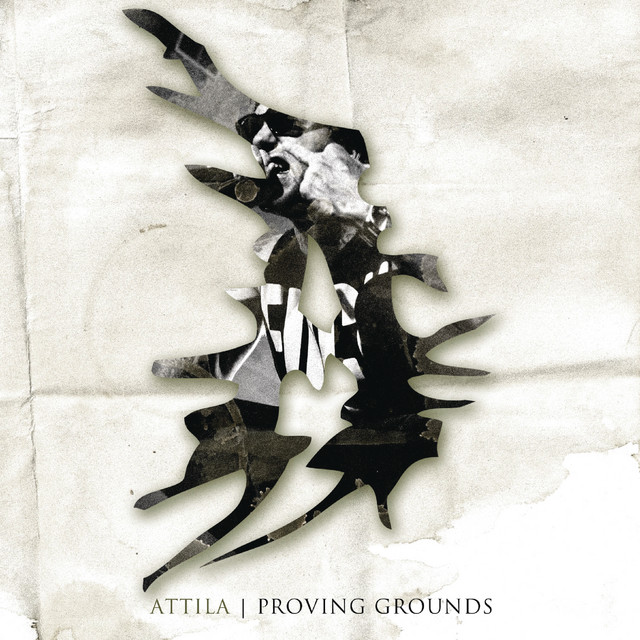

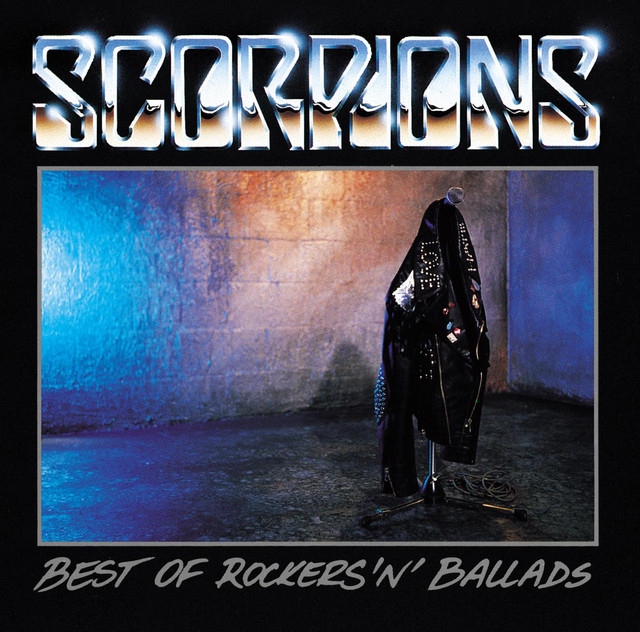

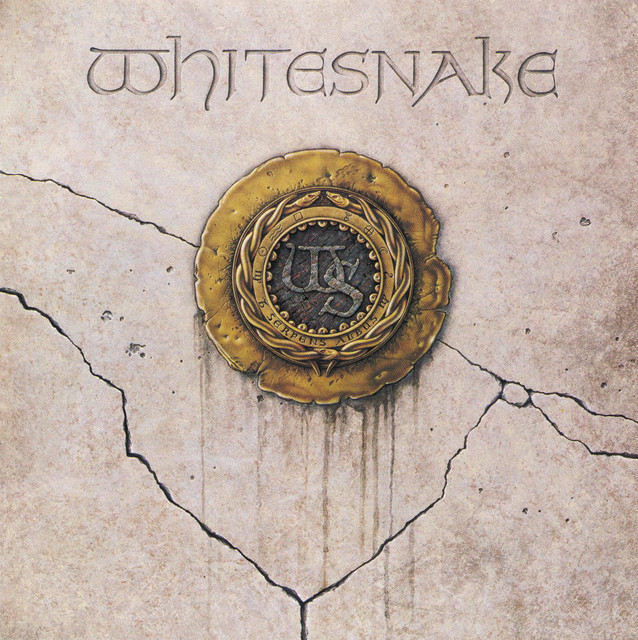

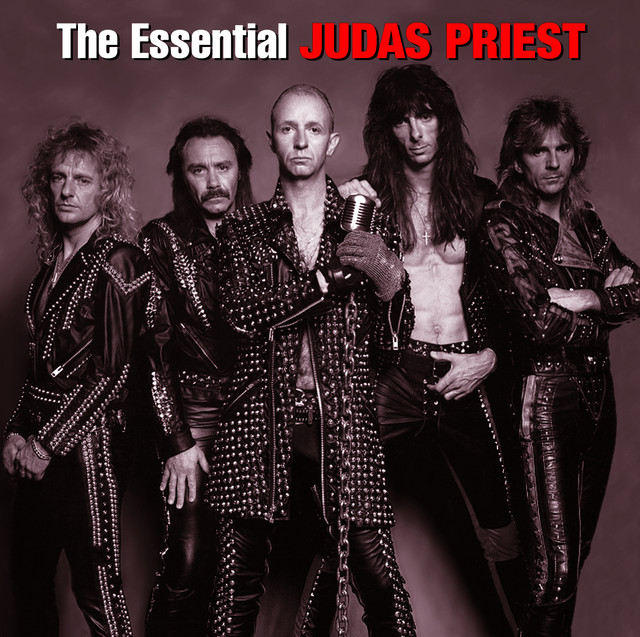

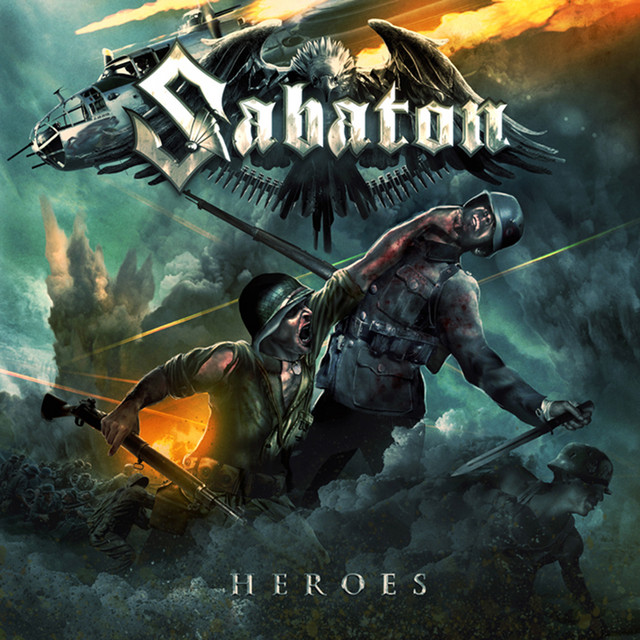

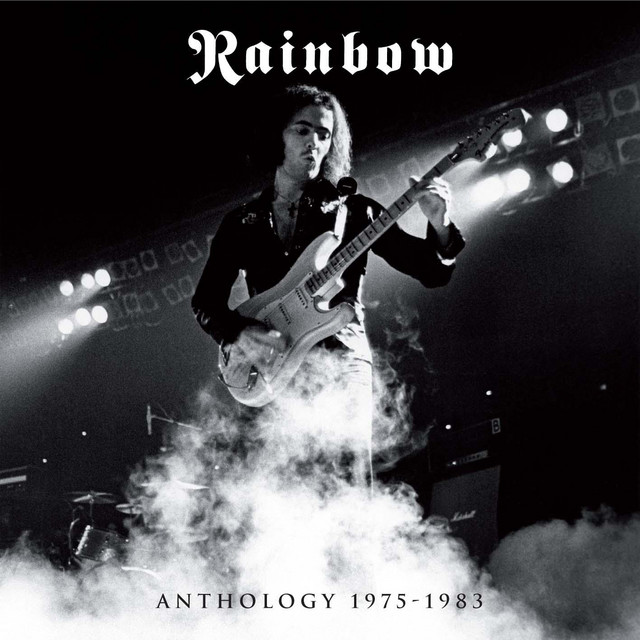

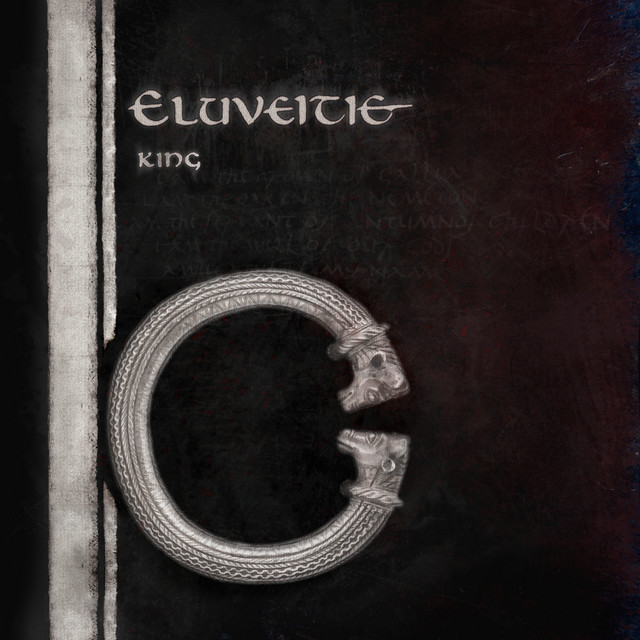

In [78]:
image_list = os.listdir('./image')
for i in range(len(image_list)):
    image_list[i] = './image/' + image_list[i]

image_list

for imageName in image_list:
    display(Image(filename=imageName))